In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

trainPath = "C:\\Users\\ronit\\Programming\\AI\\kaggle_data\\SkinCancerDataset(8c)\\train"

img_s = 190
bs = 64

trainDG = ImageDataGenerator(rescale = 1./255,
                             rotation_range=90,
                             width_shift_range=0.3,
                             height_shift_range=0.3,
                             shear_range=0.2,
                             zoom_range=0.3,
                             horizontal_flip=True,
                             featurewise_center = True,
                             featurewise_std_normalization = True
                             )

trainG = trainDG.flow_from_directory(trainPath,
                                     target_size = (img_s, img_s),
                                     class_mode = 'categorical',
                                     shuffle = True
                                     )

valPath = "C:\\Users\\ronit\\Programming\\AI\\kaggle_data\\SkinCancerDataset(8c)\\validation"

valDG = ImageDataGenerator(rescale = 1./255,
                           rotation_range = 90,
                           width_shift_range=0.3,
                           height_shift_range=0.3,
                           shear_range = 0.2,
                           zoom_range = 0.3,
                           horizontal_flip = True,
                           featurewise_center = True,
                           featurewise_std_normalization = True
                           )
valG = valDG.flow_from_directory(valPath,
                                 target_size = (img_s, img_s),
                                 class_mode = 'categorical',
                                 shuffle = True)


Found 18974 images belonging to 8 classes.
Found 3794 images belonging to 8 classes.


In [2]:
'''from PIL import Image
imgs, labels = next(trainG)
labels[:10]

Image.fromarray(imgs[1], 'RGB').show()'''


"from PIL import Image\nimgs, labels = next(trainG)\nlabels[:10]\n\nImage.fromarray(imgs[1], 'RGB').show()"

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, AveragePooling2D, BatchNormalization

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape = (img_s, img_s, 3), data_format = "channels_last"))
#model.add(BatchNormalization(axis = -1))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(BatchNormalization(axis = -1))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
##model.add(BatchNormalization(axis = -1))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
#model.add(BatchNormalization(axis = -1))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(8, activation='softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 188, 188, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 94, 94, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 512)       1

In [4]:
print(model.input.shape)

(None, 190, 190, 3)


In [5]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from datetime import datetime

estop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=20)


log_dir = 'C:\\Users\\ronit\\Programming\\AI\\kaggle_ml\\tensorboard'
timestamp = datetime.now().strftime("%Y-%m-%d--%H%M"+'_(skin-cancer-model8c)')
log_dir = log_dir + '\\' + timestamp

tboard = TensorBoard(log_dir=log_dir, 
                    histogram_freq=1,
                    write_graph=True,
                    write_images=True,
                    update_freq='epoch',
                    profile_batch=2,
                    embeddings_freq=1)

cpoint = ModelCheckpoint(filepath = 'C:\\Users\\ronit\\Programming\\AI\\kaggle_ml\\skin_cancer_model8c_{val_accuracy: .4f}val_acc.h5', 
                         save_best_only = True, 
                         save_weights_only = False, 
                         monitor = 'val_accuracy',
                         mode = 'max')

In [6]:
history = model.fit(trainG, 
                    epochs=1000, 
                    steps_per_epoch=296, 
                    validation_data = valG, 
                    verbose = 1, 
                    validation_steps=59,
                    callbacks = [estop, tboard, cpoint],
                    batch_size = 64
                    )

Epoch 1/1000
296/296 [==============================] - 255s 860ms/step - loss: 1.4198 - accuracy: 0.5043 - val_loss: 1.3374 - val_accuracy: 0.5053
Epoch 2/1000
296/296 [==============================] - 258s 871ms/step - loss: 1.3510 - accuracy: 0.5103 - val_loss: 1.3180 - val_accuracy: 0.5212
Epoch 3/1000
296/296 [==============================] - 256s 865ms/step - loss: 1.3055 - accuracy: 0.5248 - val_loss: 1.2604 - val_accuracy: 0.5440
Epoch 4/1000
296/296 [==============================] - 253s 855ms/step - loss: 1.3021 - accuracy: 0.5228 - val_loss: 1.2314 - val_accuracy: 0.5572
Epoch 5/1000
296/296 [==============================] - 252s 853ms/step - loss: 1.2505 - accuracy: 0.5415 - val_loss: 1.2966 - val_accuracy: 0.5222
Epoch 6/1000
296/296 [==============================] - 245s 828ms/step - loss: 1.2399 - accuracy: 0.5481 - val_loss: 1.2247 - val_accuracy: 0.5556
Epoch 7/1000
296/296 [==============================] - 241s 814ms/step - loss: 1.1950 - accuracy: 0.5716 - val_

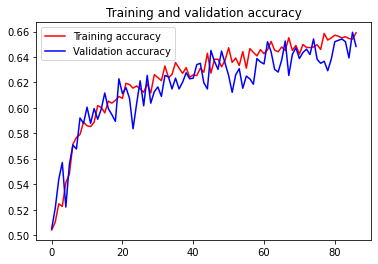

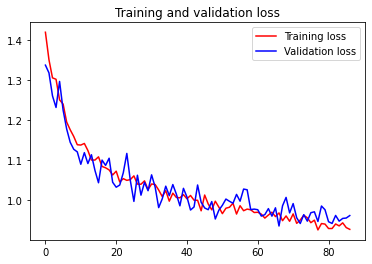

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()